In [1]:
!git clone https://github.com/aliyazdanifar81/Machine-Learning.git

Cloning into 'Machine-Learning'...
remote: Enumerating objects: 124, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 124 (delta 18), reused 19 (delta 14), pack-reused 89 (from 1)
Receiving objects: 100% (124/124), 31.11 MiB | 10.91 MiB/s, done.
Resolving deltas: 100% (22/22), done.


In [9]:
!pip uninstall opencv-contrib-python opencv-python

Found existing installation: opencv-contrib-python 4.10.0.84
Uninstalling opencv-contrib-python-4.10.0.84:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/cv2/*
    /usr/local/lib/python3.10/dist-packages/opencv_contrib_python-4.10.0.84.dist-info/*
    /usr/local/lib/python3.10/dist-packages/opencv_contrib_python.libs/libQt5Core-e6d3f451.so.5.15.13
    /usr/local/lib/python3.10/dist-packages/opencv_contrib_python.libs/libQt5Gui-5dea4132.so.5.15.13
    /usr/local/lib/python3.10/dist-packages/opencv_contrib_python.libs/libQt5Test-d435aae7.so.5.15.13
    /usr/local/lib/python3.10/dist-packages/opencv_contrib_python.libs/libQt5Widgets-e392eaf8.so.5.15.13
    /usr/local/lib/python3.10/dist-packages/opencv_contrib_python.libs/libQt5XcbQpa-3bf8a55a.so.5.15.13
    /usr/local/lib/python3.10/dist-packages/opencv_contrib_python.libs/libX11-xcb-0e257303.so.1.0.0
    /usr/local/lib/python3.10/dist-packages/opencv_contrib_python.libs/libXau-00ec42fe.so.6.0.0
    /usr/local/lib/python3.10

In [10]:
!pip install opencv-contrib-python

In [1]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt

**Functions**

In [2]:
def read_img(path):
    img = plt.imread(f"{path}", "gray")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img

**Model**

In [3]:
path, model = './hw-nums.png', tf.keras.models.load_model('/content/Machine-Learning/Supervised Learning/Convolutional Neural Networks/hoda.h5')

In [4]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 6, 6, 512)           │         295,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │          66,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,037,196 (3.96 MB)

 Trainable params: 1,037,194 (3.96 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [5]:
img = read_img(path)

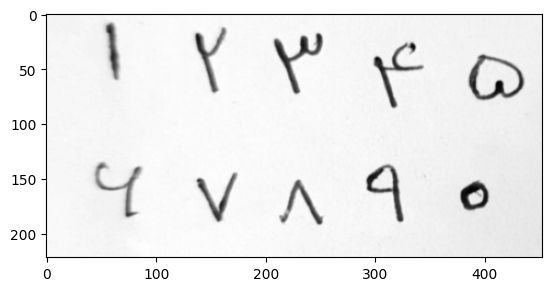

In [6]:
plt.imshow(img, cmap='gray')

In [7]:
img = cv2.GaussianBlur(img, (11, 11), 0)
img = cv2.ximgproc.niBlackThreshold(img, 255, cv2.THRESH_BINARY_INV, 41, -0.1,
                                        binarizationMethod=cv2.ximgproc.BINARIZATION_NICK).astype(np.uint8)

In [8]:
num_labels, labels, stats, cen = cv2.connectedComponentsWithStats(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


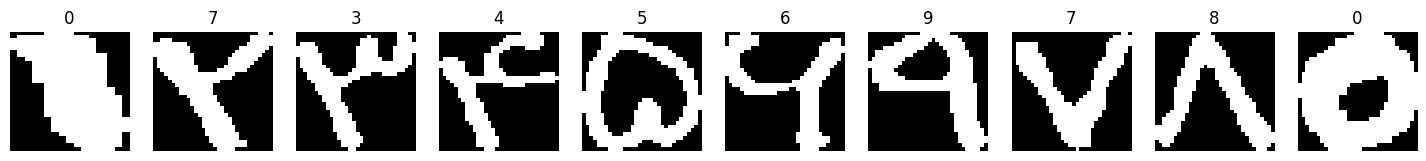

In [9]:
plt.figure(figsize=(20, 4))
for i in range(1, num_labels):
    # Display original image
    ax = plt.subplot(2, num_labels, i)
    xl, yl, w, h = stats[i][:4]
    croped = tf.image.resize(np.expand_dims(img[yl:yl+h, xl:xl+w], axis=-1), [32, 32], method='nearest').numpy()

    # Normalize the cropped image and reshape for the model
    croped = croped/255.0 # Normalize to range [0, 1]
    croped = np.expand_dims(croped, axis=0)  # Add batch dimension

    # Predict and display the result
    prediction = model.predict(croped)
    plt.imshow(croped[0, :, :, 0], cmap="gray")  # Display the original cropped image
    plt.title(f"{np.argmax(prediction)}")
    plt.axis("off")
plt.show()